In [122]:
#how to store labels? 0 to 3, binary array, or string?

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


Import, save and split data

In [124]:
shapes = ['sine', 'square','sawtooth','burst']
df = pd.read_csv('full_data.csv', header=None)
#df = pd.read_csv('data_1024.csv', header=None)

In [125]:
df.shape

(640, 324)

In [126]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,314,315,316,317,318,319,320,321,322,323
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.0,30.0,60.0,56.0,120.0,112.0,96.0,97.0,65.0,67.0,...,3.0,7.0,7.0,15.0,30.0,28.0,0.0,1.0,0.0,0.0
3,36.0,32.0,36.0,32.0,32.0,32.0,4.0,4.0,36.0,4.0,...,0.0,32.0,36.0,32.0,32.0,32.0,1.0,0.0,0.0,0.0
4,0.0,30.0,0.0,0.0,3.0,64.0,0.0,0.0,112.0,0.0,...,64.0,0.0,0.0,120.0,0.0,0.0,0.0,0.0,1.0,0.0


In [127]:
X = df.drop(df.columns[-4:],axis=1).values

In [128]:
X.shape

(640, 320)

In [196]:
Y = df.iloc[:,-4:].values
#df[df[100]>15 and df[200]<10]
Y_robin = [df[val].values for val in range(-4,0)]
print(Y)
print("---")
print(np.array(Y_robin).transpose())

TypeError: '(slice(None, None, None), -4)' is an invalid key

In [180]:
Y

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [130]:
Y.shape

(640, 4)

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [132]:
X_train.shape

(512, 320)

In [ ]:
#use scaler??   

First Model - 
- using sigmoid for outputs
- 80 epochs
- layer1 = 100
- layer2 = 50

In [101]:
model = Sequential()

model.add(Dense(100,activation='sigmoid'))
model.add(Dense(50,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(4,activation='sigmoid')) 

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
model.fit(x=X_train, y=Y_train, epochs=100, validation_data=(X_test, Y_test)) #was 100 but changed to 80 because it's the first time it hit accuracy 1

Epoch 1/100
5/5 [==============================] - 0s 52ms/step - loss: 1.3971 - accuracy: 0.2500 - val_loss: 1.3929 - val_accuracy: 0.2500
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 1.3671 - accuracy: 0.2500 - val_loss: 1.3813 - val_accuracy: 0.2500
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 1.3484 - accuracy: 0.3375 - val_loss: 1.3700 - val_accuracy: 0.4500
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 1.3349 - accuracy: 0.5750 - val_loss: 1.3607 - val_accuracy: 0.4750
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 1.3176 - accuracy: 0.6812 - val_loss: 1.3517 - val_accuracy: 0.4250
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 1.3013 - accuracy: 0.5938 - val_loss: 1.3432 - val_accuracy: 0.4000
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 1.2854 - accuracy: 0.6125 - val_loss: 1.3339 - val_accuracy: 0.4000
Epoch 8/100
5/5 [===

In [56]:
loss_acc_df = pd.DataFrame(model.history.history)
loss_acc_df

,loss,accuracy,val_loss,val_accuracy
0,1.320969,0.382812,1.291417,0.320312
1,1.206415,0.601562,1.219546,0.445312
2,1.097588,0.712891,1.148925,0.492188
3,0.999437,0.769531,1.083905,0.523438
4,0.909609,0.761719,1.039993,0.578125
...,...,...,...,...
95,0.002453,1.000000,1.510520,0.656250
96,0.002510,1.000000,1.621381,0.648438
97,0.004113,0.998047,1.610013,0.664062
98,0.003761,1.000000,1.643598,0.648438


<AxesSubplot:>

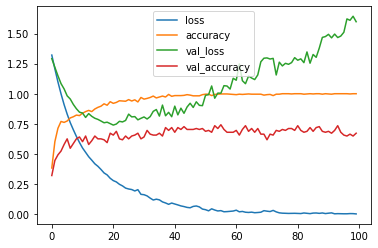

In [103]:
loss_acc_df.plot()

In [66]:
print(model.evaluate(X_test, Y_test)[1])

4/4 [==============================] - 0s 2ms/step - loss: 1.1033 - accuracy: 0.5938
0.59375


In [67]:
test_predictions = model.predict(X_test)

In [80]:
print(test_predictions.round(decimals=3)[:50])

[[0.003 0.003 0.033 0.   ]
 [0.    0.    0.001 0.25 ]
 [0.007 0.028 0.001 0.   ]
 [0.028 0.003 0.001 0.   ]
 [0.02  0.014 0.    0.   ]
 [0.007 0.001 0.012 0.002]
 [0.    0.06  0.001 0.034]
 [0.002 0.009 0.001 0.   ]
 [0.    0.    0.    0.712]
 [0.029 0.011 0.001 0.   ]
 [0.    0.001 0.033 0.   ]
 [0.004 0.002 0.    0.   ]
 [0.    0.134 0.    0.   ]
 [0.002 0.001 0.008 0.   ]
 [0.    0.004 0.011 0.   ]
 [0.053 0.004 0.003 0.   ]
 [0.001 0.007 0.001 0.   ]
 [0.001 0.    0.006 0.   ]
 [0.    0.003 0.001 0.   ]
 [0.001 0.008 0.001 0.   ]
 [0.    0.011 0.032 0.118]
 [0.032 0.    0.    0.   ]
 [0.007 0.01  0.002 0.   ]
 [0.    0.002 0.    0.016]
 [0.    0.001 0.009 0.019]
 [0.007 0.    0.062 0.001]
 [0.    0.002 0.    0.041]
 [0.01  0.002 0.028 0.   ]
 [0.001 0.    0.008 0.   ]
 [0.    0.001 0.001 0.057]
 [0.001 0.118 0.001 0.   ]
 [0.006 0.015 0.    0.   ]
 [0.078 0.    0.008 0.   ]
 [0.014 0.003 0.001 0.   ]
 [0.001 0.    0.022 0.   ]
 [0.003 0.022 0.001 0.   ]
 [0.001 0.009 0.003 0.02 ]
 

In [81]:
Y_test[:50]

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],


Getting indexes 0 to 3 of values on marix that have max value to compute tables below

In [70]:
test_predictions_indices = np.argmax(test_predictions, axis=1)
test_predictions_indices[:10]

array([2, 3, 1, 0, 0, 2, 1, 1, 3, 0])

In [71]:
Y_test_indices = np.argmax(Y_test, axis=1)
Y_test_indices[:10]

array([2, 3, 1, 0, 1, 1, 3, 0, 3, 0])

Confusion matrix


In [74]:
print(confusion_matrix(Y_test_indices, test_predictions_indices,))

[[16  8  1  0]
 [14 18  3  0]
 [ 2  6 23  6]
 [ 0  4  8 19]]


Model 2 - same as above but using softmax

Model 3 - Using early stop

In [119]:
model = Sequential()

model.add(Dense(100,activation='sigmoid'))
model.add(Dense(50,activation='sigmoid'))
model.add(Dense(4,activation='sigmoid'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [133]:
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=100)

In [121]:
model.fit(x=X_train, y=Y_train, epochs=5000, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/5000
5/5 [==============================] - 0s 67ms/step - loss: 1.4066 - accuracy: 0.2438 - val_loss: 1.3449 - val_accuracy: 0.4000
Epoch 2/5000
5/5 [==============================] - 0s 15ms/step - loss: 1.2871 - accuracy: 0.3938 - val_loss: 1.3164 - val_accuracy: 0.4000
Epoch 3/5000
5/5 [==============================] - 0s 14ms/step - loss: 1.2228 - accuracy: 0.5562 - val_loss: 1.2879 - val_accuracy: 0.4000
Epoch 4/5000
5/5 [==============================] - 0s 16ms/step - loss: 1.1700 - accuracy: 0.6938 - val_loss: 1.2585 - val_accuracy: 0.4000
Epoch 5/5000
5/5 [==============================] - 0s 16ms/step - loss: 1.1201 - accuracy: 0.7625 - val_loss: 1.2326 - val_accuracy: 0.4750
Epoch 6/5000
5/5 [==============================] - 0s 16ms/step - loss: 1.0730 - accuracy: 0.7750 - val_loss: 1.2058 - val_accuracy: 0.3250
Epoch 7/5000
5/5 [==============================] - 0s 14ms/step - loss: 1.0362 - accuracy: 0.7688 - val_loss: 1.1794 - val_accuracy: 0.5250
Epoch 8/5000


Model 4 - using early stop and dropouts

In [134]:
model = Sequential()

model.add(Dense(100,activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [135]:
model.fit(x=X_train, y=Y_train, epochs=5000, validation_data=(X_test,Y_test), callbacks=[early_stop])

==============] - 0s 7ms/step - loss: 0.3516 - accuracy: 0.8340 - val_loss: 0.7271 - val_accuracy: 0.6797
Epoch 93/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3281 - accuracy: 0.8594 - val_loss: 0.7378 - val_accuracy: 0.6641
Epoch 94/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3010 - accuracy: 0.8828 - val_loss: 0.7276 - val_accuracy: 0.6562
Epoch 95/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.3299 - accuracy: 0.8496 - val_loss: 0.7597 - val_accuracy: 0.6797
Epoch 96/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.3488 - accuracy: 0.8477 - val_loss: 0.7514 - val_accuracy: 0.6641
Epoch 97/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2798 - accuracy: 0.8730 - val_loss: 0.7276 - val_accuracy: 0.6562
Epoch 98/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.3260 - accuracy: 0.8535 - val_loss: 0.7360 - val_accuracy: 0.6953
Epoch 99/5000
16/16 [===============

In [ ]:
model.predict(X_test).round(3)

In [ ]:
#predictions = model.predict_classes(X_test)
Y_predictions = np.argmax(model.predict(X_test), axis=1)

In [ ]:
Y_predictions

In [ ]:
Y_test_indices = np.argmax(Y_test, axis=1)

In [ ]:
Y_test_indices

In [ ]:
print(confusion_matrix(Y_test_indices, Y_predictions))

In [ ]:
print(classification_report(Y_test_indices, Y_predictions))